# <font color='Blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e tensor Flow 

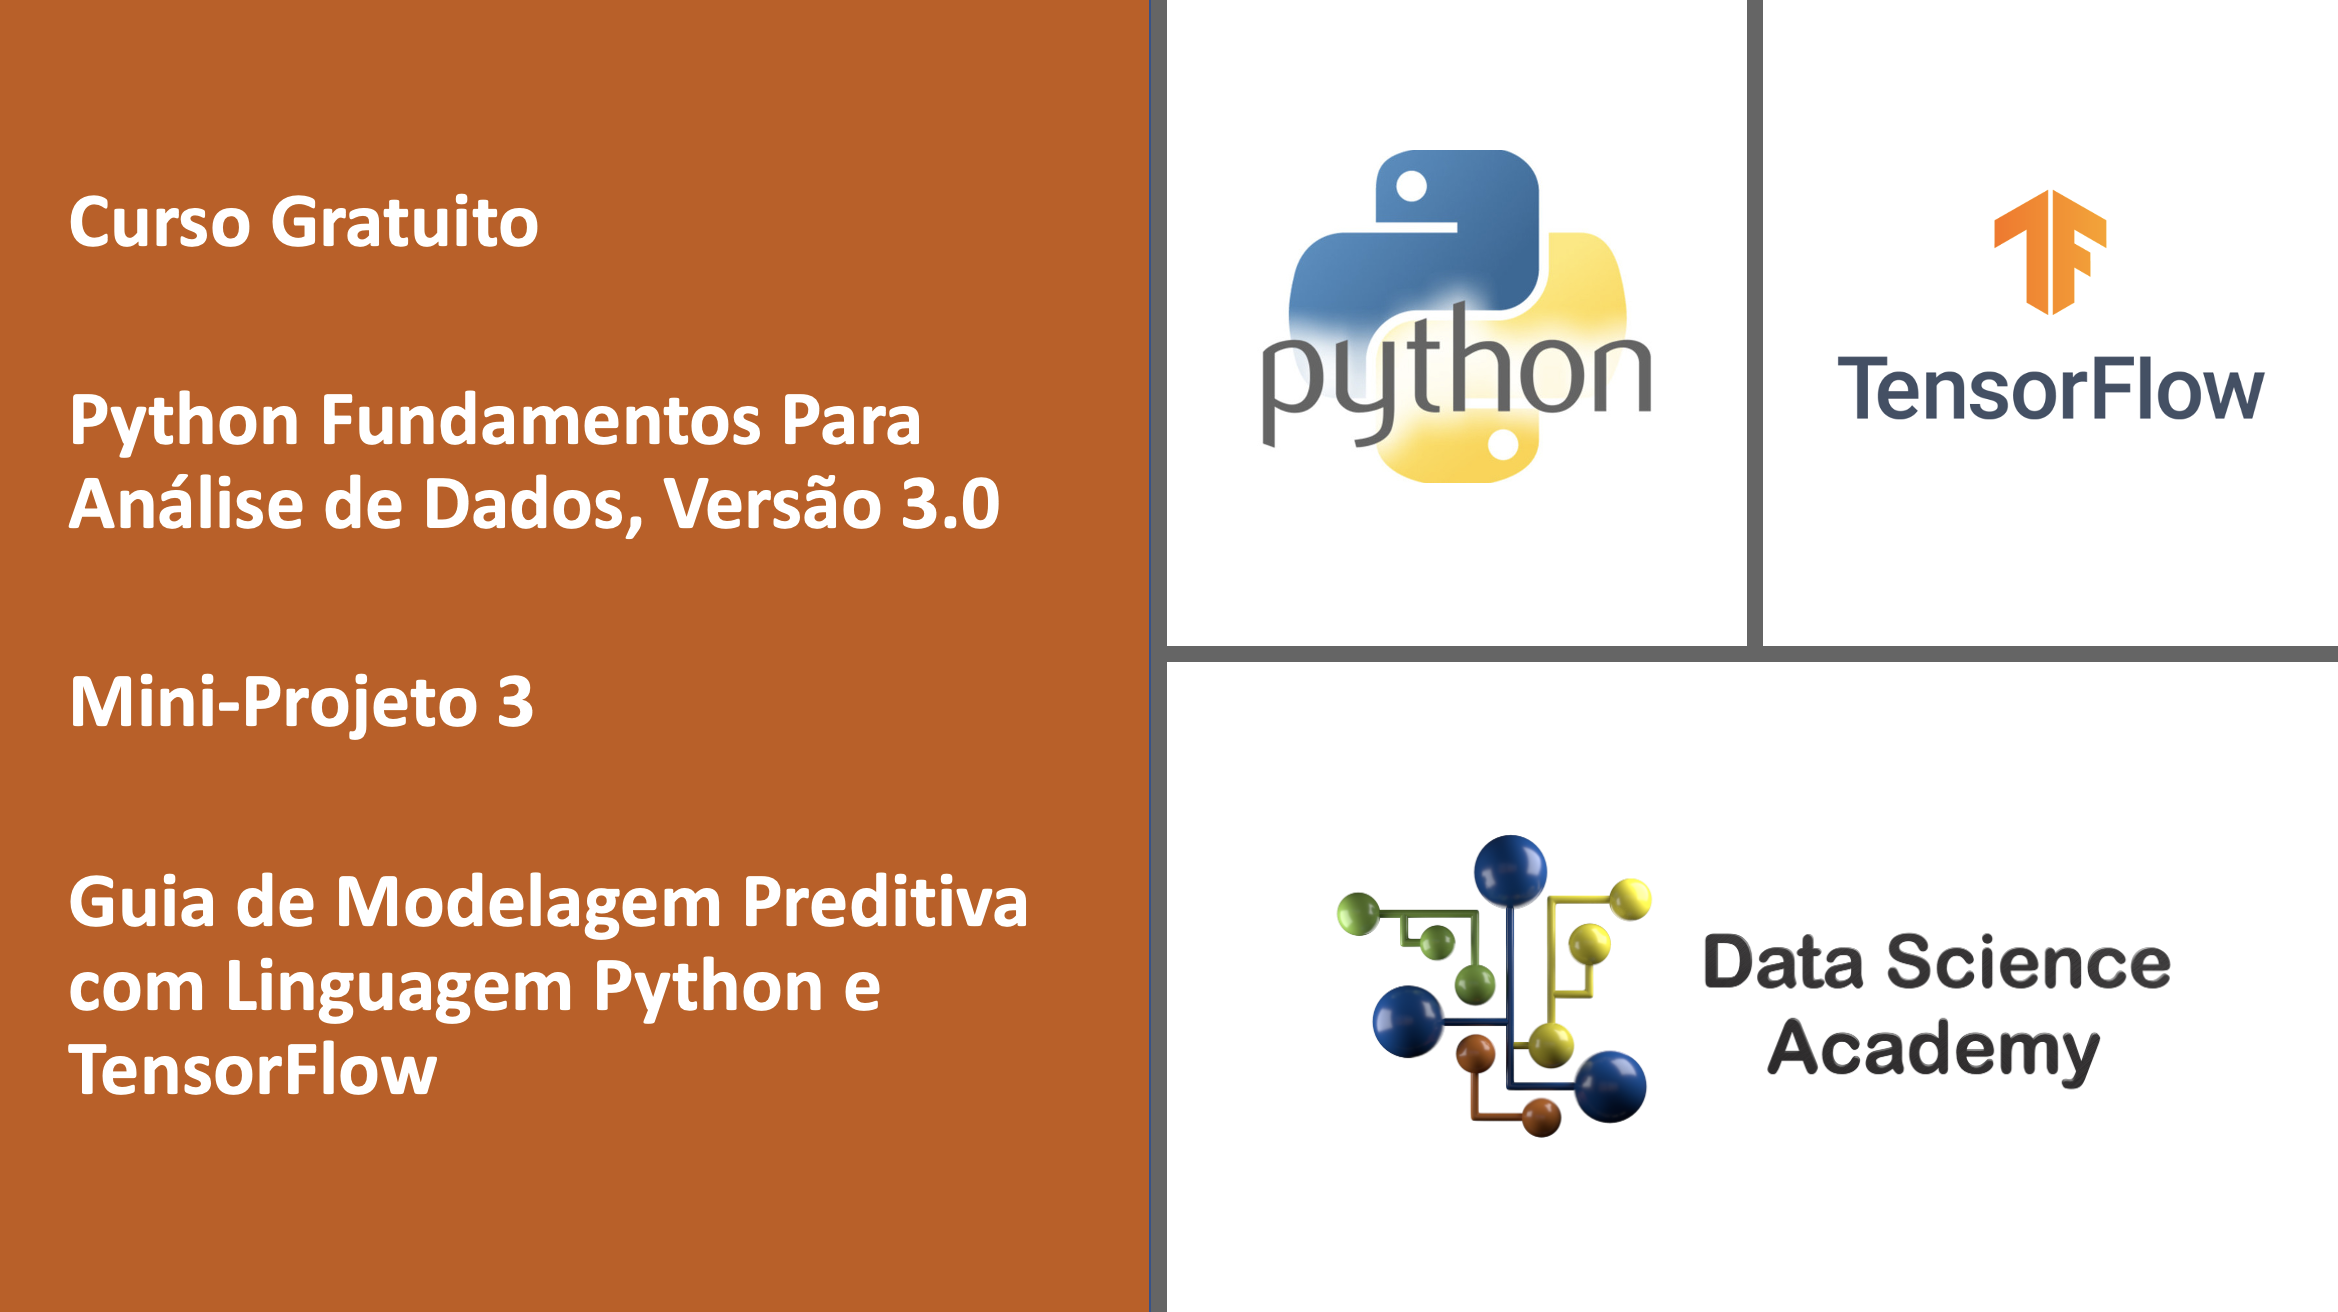

In [1]:
from IPython.display import Image
Image('imagens/mini-projeto3.png')

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

## Instando e Carregando Pacotes

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.2


In [3]:
# Instala o TensorFlow
# !pip install -q tensorflow==2.5

In [4]:
# Instala o Pydot
# !pip install -q pydot

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.8.0


## Carregando Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

### Características:

- Número de observações: 506.
- Os primeiros 13 recursos são recursos preditivos numéricos / categóricos.
- O último (atributo 14): o valor mediano é a variável de destino.

In [7]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [8]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM',
                 'AGE',
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION',
                 'B',
                 'LSTAT',
                 'MEDV']

In [9]:
# Carrega os dados
dataset = pd.read_csv(dataset_path,
                      names=nomes_colunas,
                      na_values="?",
                      comment='\t',
                      sep=" ",
                      skipinitialspace=True)

In [10]:
# Shape
dataset.shape

(506, 14)

In [11]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [12]:
# Split dos dados
dados_treino = dataset.sample(frac=0.8, random_state=0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

- Variável independente: "RM".
- Variável dependente: "MEDV".

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

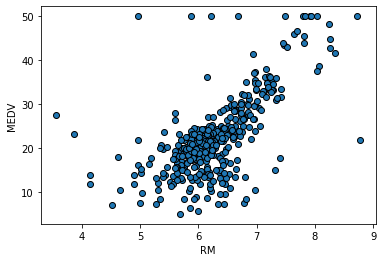

In [13]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [14]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*Layers.Dense(1, use_bias=True, input_shape=(1,))*

In [15]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

 MAE = Mean Absolute Error
 
 MSE = Mean Squared Error

In [16]:
# Cria o modelo
modelo = modelo_linear()

In [17]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True,
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False,
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Treinando o Modelo

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [19]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=n_idle_epochs,
                                                 min_delta=0.001)

In [20]:
# Lista para as previsões
predictions_list = []

In [21]:
# Caminho para salvar o checkpoint
checkpoint_path = "dados/"

In [22]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath="dados/",
                                                        verbose=1,
                                                        save_weights_only=True,
                                                        save_freq=n_samples_save)

In [23]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 10))

In [24]:
# Treinamento
history = modelo.fit(x_treino,
                     y_treino,
                     batch_size=batch_size,
                     epochs=n_epochs,
                     validation_split=0.1,
                     verbose=1,
                     callbacks = [earlyStopping,checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 155ms/step - loss: 705.9200 - mae: 25.0192 - mse: 705.9200 - val_loss: 801.4973 - val_mae: 26.2986 - val_mse: 801.4973
Epoch 2/4000
2/2 [==============================] - 0s 22ms/step - loss: 698.5952 - mae: 24.8740 - mse: 698.5952 - val_loss: 793.7150 - val_mae: 26.1528 - val_mse: 793.7150
Epoch 3/4000
2/2 [==============================] - 0s 21ms/step - loss: 691.1837 - mae: 24.7289 - mse: 691.1837 - val_loss: 785.9836 - val_mae: 26.0072 - val_mse: 785.9836
Epoch 4/4000
2/2 [==============================] - 0s 21ms/step - loss: 683.9286 - mae: 24.5839 - mse: 683.9286 - val_loss: 778.3014 - val_mae: 25.8617 - val_mse: 778.3014
Epoch 5/4000
2/2 [==============================] - 0s 21ms/step - loss: 676.6749 - mae: 24.4391 - mse: 676.6749 - val_loss: 770.6792 - val_mae: 25.7165 - val_mse: 770.6792
Epoch 6/4000
2/2 [==============================] - 0s 19ms/step - loss: 669.4332 - mae: 24.2946 - mse: 669.4332 - val_loss: 763.1145 

2/2 [==============================] - 0s 19ms/step - loss: 414.4613 - mae: 18.4886 - mse: 414.4613 - val_loss: 494.3665 - val_mae: 19.7547 - val_mse: 494.3665
Epoch 49/4000
2/2 [==============================] - 0s 21ms/step - loss: 409.5483 - mae: 18.3582 - mse: 409.5483 - val_loss: 489.1139 - val_mae: 19.6240 - val_mse: 489.1139
Epoch 50/4000
2/2 [==============================] - 0s 22ms/step - loss: 404.6234 - mae: 18.2282 - mse: 404.6234 - val_loss: 483.9185 - val_mae: 19.4940 - val_mse: 483.9185
Epoch 51/4000
2/2 [==============================] - 0s 22ms/step - loss: 399.7476 - mae: 18.0987 - mse: 399.7476 - val_loss: 478.7686 - val_mae: 19.3642 - val_mse: 478.7686
Epoch 52/4000
2/2 [==============================] - 0s 20ms/step - loss: 394.9568 - mae: 17.9693 - mse: 394.9568 - val_loss: 473.6556 - val_mae: 19.2345 - val_mse: 473.6556
Epoch 53/4000
2/2 [==============================] - 0s 22ms/step - loss: 390.2549 - mae: 17.8404 - mse: 390.2549 - val_loss: 468.5886 - val_mae

2/2 [==============================] - 0s 22ms/step - loss: 229.3628 - mae: 12.8734 - mse: 229.3628 - val_loss: 295.8714 - val_mae: 14.1600 - val_mse: 295.8714
Epoch 96/4000
2/2 [==============================] - 0s 23ms/step - loss: 226.3685 - mae: 12.7687 - mse: 226.3685 - val_loss: 292.6328 - val_mae: 14.0576 - val_mse: 292.6328
Epoch 97/4000
2/2 [==============================] - 0s 20ms/step - loss: 223.4234 - mae: 12.6659 - mse: 223.4234 - val_loss: 289.4299 - val_mae: 13.9555 - val_mse: 289.4299
Epoch 98/4000
2/2 [==============================] - 0s 20ms/step - loss: 220.5315 - mae: 12.5640 - mse: 220.5315 - val_loss: 286.2625 - val_mae: 13.8537 - val_mse: 286.2625
Epoch 99/4000
2/2 [==============================] - 0s 23ms/step - loss: 217.6530 - mae: 12.4607 - mse: 217.6530 - val_loss: 283.1350 - val_mae: 13.7524 - val_mse: 283.1350
Epoch 100/4000
2/2 [==============================] - 0s 20ms/step - loss: 214.7961 - mae: 12.3579 - mse: 214.7961 - val_loss: 280.0427 - val_ma

2/2 [==============================] - 0s 24ms/step - loss: 123.8661 - mae: 8.6790 - mse: 123.8661 - val_loss: 179.1353 - val_mae: 10.1524 - val_mse: 179.1353
Epoch 143/4000
2/2 [==============================] - 0s 20ms/step - loss: 122.3383 - mae: 8.6125 - mse: 122.3383 - val_loss: 177.3692 - val_mae: 10.0812 - val_mse: 177.3692
Epoch 144/4000
2/2 [==============================] - 0s 22ms/step - loss: 120.8187 - mae: 8.5461 - mse: 120.8187 - val_loss: 175.6344 - val_mae: 10.0122 - val_mse: 175.6344
Epoch 145/4000
2/2 [==============================] - 0s 21ms/step - loss: 119.2679 - mae: 8.4795 - mse: 119.2679 - val_loss: 173.9275 - val_mae: 9.9463 - val_mse: 173.9275
Epoch 146/4000
2/2 [==============================] - 0s 23ms/step - loss: 117.8452 - mae: 8.4155 - mse: 117.8452 - val_loss: 172.2333 - val_mae: 9.8802 - val_mse: 172.2333
Epoch 147/4000
2/2 [==============================] - 0s 21ms/step - loss: 116.3748 - mae: 8.3521 - mse: 116.3748 - val_loss: 170.5699 - val_mae: 9

Epoch 190/4000
2/2 [==============================] - 0s 20ms/step - loss: 73.6643 - mae: 6.2430 - mse: 73.6643 - val_loss: 119.8019 - val_mae: 7.8053 - val_mse: 119.8019
Epoch 191/4000
2/2 [==============================] - 0s 21ms/step - loss: 73.0584 - mae: 6.2096 - mse: 73.0584 - val_loss: 119.0445 - val_mae: 7.7740 - val_mse: 119.0445
Epoch 192/4000
2/2 [==============================] - 0s 23ms/step - loss: 72.4717 - mae: 6.1764 - mse: 72.4717 - val_loss: 118.3029 - val_mae: 7.7430 - val_mse: 118.3029
Epoch 193/4000
2/2 [==============================] - 0s 21ms/step - loss: 71.8827 - mae: 6.1451 - mse: 71.8827 - val_loss: 117.5737 - val_mae: 7.7138 - val_mse: 117.5737
Epoch 194/4000
2/2 [==============================] - 0s 22ms/step - loss: 71.3441 - mae: 6.1132 - mse: 71.3441 - val_loss: 116.8512 - val_mae: 7.6862 - val_mse: 116.8512
Epoch 195/4000
2/2 [==============================] - 0s 19ms/step - loss: 70.7930 - mae: 6.0817 - mse: 70.7930 - val_loss: 116.1440 - val_mae: 7

Epoch 238/4000
2/2 [==============================] - 0s 22ms/step - loss: 58.0264 - mae: 5.3342 - mse: 58.0264 - val_loss: 98.0613 - val_mae: 6.9426 - val_mse: 98.0613
Epoch 239/4000
2/2 [==============================] - 0s 21ms/step - loss: 57.9001 - mae: 5.3292 - mse: 57.9001 - val_loss: 97.8357 - val_mae: 6.9359 - val_mse: 97.8357
Epoch 240/4000
2/2 [==============================] - 0s 24ms/step - loss: 57.7925 - mae: 5.3236 - mse: 57.7925 - val_loss: 97.6174 - val_mae: 6.9292 - val_mse: 97.6174
Epoch 241/4000
2/2 [==============================] - 0s 24ms/step - loss: 57.6796 - mae: 5.3185 - mse: 57.6796 - val_loss: 97.4142 - val_mae: 6.9229 - val_mse: 97.4142
Epoch 242/4000
2/2 [==============================] - 0s 21ms/step - loss: 57.5514 - mae: 5.3127 - mse: 57.5514 - val_loss: 97.2245 - val_mae: 6.9169 - val_mse: 97.2245
Epoch 243/4000
2/2 [==============================] - 0s 22ms/step - loss: 57.4581 - mae: 5.3088 - mse: 57.4581 - val_loss: 97.0375 - val_mae: 6.9110 - val

2/2 [==============================] - 0s 24ms/step - loss: 55.6995 - mae: 5.3082 - mse: 55.6995 - val_loss: 92.8756 - val_mae: 6.8261 - val_mse: 92.8756
Epoch 287/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6901 - mae: 5.3095 - mse: 55.6901 - val_loss: 92.8421 - val_mae: 6.8258 - val_mse: 92.8421
Epoch 288/4000
2/2 [==============================] - 0s 25ms/step - loss: 55.6829 - mae: 5.3105 - mse: 55.6829 - val_loss: 92.8097 - val_mae: 6.8255 - val_mse: 92.8097
Epoch 289/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.6732 - mae: 5.3113 - mse: 55.6732 - val_loss: 92.7775 - val_mae: 6.8253 - val_mse: 92.7775
Epoch 290/4000
2/2 [==============================] - 0s 25ms/step - loss: 55.6657 - mae: 5.3123 - mse: 55.6657 - val_loss: 92.7405 - val_mae: 6.8250 - val_mse: 92.7405
Epoch 291/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6630 - mae: 5.3139 - mse: 55.6630 - val_loss: 92.7012 - val_mae: 6.8247 - val_mse: 92.7012
E

2/2 [==============================] - 0s 28ms/step - loss: 55.5213 - mae: 5.3306 - mse: 55.5213 - val_loss: 92.1958 - val_mae: 6.8170 - val_mse: 92.1958
Epoch 335/4000
2/2 [==============================] - 0s 33ms/step - loss: 55.5189 - mae: 5.3306 - mse: 55.5189 - val_loss: 92.1892 - val_mae: 6.8168 - val_mse: 92.1892
Epoch 336/4000
2/2 [==============================] - 0s 39ms/step - loss: 55.5165 - mae: 5.3309 - mse: 55.5165 - val_loss: 92.1768 - val_mae: 6.8166 - val_mse: 92.1768
Epoch 337/4000
2/2 [==============================] - 0s 32ms/step - loss: 55.5128 - mae: 5.3312 - mse: 55.5128 - val_loss: 92.1680 - val_mae: 6.8164 - val_mse: 92.1680
Epoch 338/4000
2/2 [==============================] - 0s 29ms/step - loss: 55.5098 - mae: 5.3315 - mse: 55.5098 - val_loss: 92.1579 - val_mae: 6.8162 - val_mse: 92.1579
Epoch 339/4000
2/2 [==============================] - 0s 25ms/step - loss: 55.5083 - mae: 5.3320 - mse: 55.5083 - val_loss: 92.1432 - val_mae: 6.8160 - val_mse: 92.1432
E

2/2 [==============================] - 0s 31ms/step - loss: 55.3628 - mae: 5.3327 - mse: 55.3628 - val_loss: 91.9261 - val_mae: 6.8073 - val_mse: 91.9261
Epoch 383/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.3597 - mae: 5.3315 - mse: 55.3597 - val_loss: 91.9352 - val_mae: 6.8072 - val_mse: 91.9352
Epoch 384/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.3547 - mae: 5.3307 - mse: 55.3547 - val_loss: 91.9395 - val_mae: 6.8070 - val_mse: 91.9395
Epoch 385/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.3492 - mae: 5.3298 - mse: 55.3492 - val_loss: 91.9550 - val_mae: 6.8069 - val_mse: 91.9550
Epoch 386/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.3450 - mae: 5.3283 - mse: 55.3450 - val_loss: 91.9733 - val_mae: 6.8068 - val_mse: 91.9733
Epoch 387/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.3400 - mae: 5.3267 - mse: 55.3400 - val_loss: 91.9940 - val_mae: 6.8067 - val_mse: 91.9940
E

2/2 [==============================] - 0s 30ms/step - loss: 55.1286 - mae: 5.3092 - mse: 55.1286 - val_loss: 91.9323 - val_mae: 6.7954 - val_mse: 91.9323
Epoch 431/4000
2/2 [==============================] - 0s 27ms/step - loss: 55.1258 - mae: 5.3072 - mse: 55.1258 - val_loss: 91.9572 - val_mae: 6.7953 - val_mse: 91.9572
Epoch 432/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.1212 - mae: 5.3054 - mse: 55.1212 - val_loss: 91.9707 - val_mae: 6.7951 - val_mse: 91.9707
Epoch 433/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.1162 - mae: 5.3043 - mse: 55.1162 - val_loss: 91.9710 - val_mae: 6.7948 - val_mse: 91.9710
Epoch 434/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.1095 - mae: 5.3038 - mse: 55.1095 - val_loss: 91.9578 - val_mae: 6.7944 - val_mse: 91.9578
Epoch 435/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.1031 - mae: 5.3041 - mse: 55.1031 - val_loss: 91.9334 - val_mae: 6.7939 - val_mse: 91.9334
E

2/2 [==============================] - 0s 25ms/step - loss: 54.8097 - mae: 5.2929 - mse: 54.8097 - val_loss: 91.6490 - val_mae: 6.7771 - val_mse: 91.6490
Epoch 479/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.8012 - mae: 5.2920 - mse: 54.8012 - val_loss: 91.6548 - val_mae: 6.7768 - val_mse: 91.6548
Epoch 480/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.7938 - mae: 5.2912 - mse: 54.7938 - val_loss: 91.6455 - val_mae: 6.7763 - val_mse: 91.6455
Epoch 481/4000
2/2 [==============================] - 0s 27ms/step - loss: 54.7881 - mae: 5.2913 - mse: 54.7881 - val_loss: 91.6269 - val_mae: 6.7758 - val_mse: 91.6269
Epoch 482/4000
2/2 [==============================] - 0s 29ms/step - loss: 54.7783 - mae: 5.2914 - mse: 54.7783 - val_loss: 91.6201 - val_mae: 6.7754 - val_mse: 91.6201
Epoch 483/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.7721 - mae: 5.2913 - mse: 54.7721 - val_loss: 91.6084 - val_mae: 6.7749 - val_mse: 91.6084
E

2/2 [==============================] - 0s 27ms/step - loss: 54.4203 - mae: 5.2684 - mse: 54.4203 - val_loss: 91.3751 - val_mae: 6.7551 - val_mse: 91.3751
Epoch 527/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.4167 - mae: 5.2707 - mse: 54.4167 - val_loss: 91.3414 - val_mae: 6.7544 - val_mse: 91.3414
Epoch 528/4000
2/2 [==============================] - 0s 25ms/step - loss: 54.4018 - mae: 5.2711 - mse: 54.4018 - val_loss: 91.3383 - val_mae: 6.7539 - val_mse: 91.3383
Epoch 529/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.3919 - mae: 5.2702 - mse: 54.3919 - val_loss: 91.3429 - val_mae: 6.7535 - val_mse: 91.3429
Epoch 530/4000
2/2 [==============================] - 0s 35ms/step - loss: 54.3842 - mae: 5.2690 - mse: 54.3842 - val_loss: 91.3400 - val_mae: 6.7530 - val_mse: 91.3400
Epoch 531/4000
2/2 [==============================] - 0s 53ms/step - loss: 54.3763 - mae: 5.2684 - mse: 54.3763 - val_loss: 91.3187 - val_mae: 6.7524 - val_mse: 91.3187
E

2/2 [==============================] - 0s 26ms/step - loss: 53.9738 - mae: 5.2439 - mse: 53.9738 - val_loss: 91.0881 - val_mae: 6.7297 - val_mse: 91.0881
Epoch 575/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.9717 - mae: 5.2423 - mse: 53.9717 - val_loss: 91.0897 - val_mae: 6.7293 - val_mse: 91.0897
Epoch 576/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.9568 - mae: 5.2419 - mse: 53.9568 - val_loss: 91.0514 - val_mae: 6.7285 - val_mse: 91.0514
Epoch 577/4000
2/2 [==============================] - 0s 35ms/step - loss: 53.9462 - mae: 5.2430 - mse: 53.9462 - val_loss: 91.0158 - val_mae: 6.7278 - val_mse: 91.0158
Epoch 578/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.9360 - mae: 5.2440 - mse: 53.9360 - val_loss: 90.9792 - val_mae: 6.7271 - val_mse: 90.9792
Epoch 579/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.9286 - mae: 5.2456 - mse: 53.9286 - val_loss: 90.9315 - val_mae: 6.7263 - val_mse: 90.9315
E

2/2 [==============================] - 0s 25ms/step - loss: 53.5604 - mae: 5.2174 - mse: 53.5604 - val_loss: 90.7864 - val_mae: 6.7055 - val_mse: 90.7864
Epoch 623/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.5512 - mae: 5.2196 - mse: 53.5512 - val_loss: 90.7454 - val_mae: 6.7048 - val_mse: 90.7454
Epoch 624/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.5416 - mae: 5.2208 - mse: 53.5416 - val_loss: 90.7124 - val_mae: 6.7041 - val_mse: 90.7124
Epoch 625/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.5318 - mae: 5.2217 - mse: 53.5318 - val_loss: 90.6827 - val_mae: 6.7034 - val_mse: 90.6827
Epoch 626/4000
2/2 [==============================] - 0s 34ms/step - loss: 53.5291 - mae: 5.2236 - mse: 53.5291 - val_loss: 90.6546 - val_mae: 6.7027 - val_mse: 90.6546
Epoch 627/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.5152 - mae: 5.2235 - mse: 53.5152 - val_loss: 90.6570 - val_mae: 6.7023 - val_mse: 90.6570
E

2/2 [==============================] - 0s 23ms/step - loss: 53.1461 - mae: 5.2047 - mse: 53.1461 - val_loss: 90.3365 - val_mae: 6.6798 - val_mse: 90.3365
Epoch 671/4000
2/2 [==============================] - 0s 22ms/step - loss: 53.1349 - mae: 5.2049 - mse: 53.1349 - val_loss: 90.3009 - val_mae: 6.6791 - val_mse: 90.3009
Epoch 672/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.1388 - mae: 5.2074 - mse: 53.1388 - val_loss: 90.2660 - val_mae: 6.6783 - val_mse: 90.2660
Epoch 673/4000
2/2 [==============================] - 0s 22ms/step - loss: 53.1205 - mae: 5.2079 - mse: 53.1205 - val_loss: 90.2794 - val_mae: 6.6779 - val_mse: 90.2794
Epoch 674/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.1091 - mae: 5.2058 - mse: 53.1091 - val_loss: 90.3201 - val_mae: 6.6777 - val_mse: 90.3201
Epoch 675/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.1074 - mae: 5.2018 - mse: 53.1074 - val_loss: 90.3867 - val_mae: 6.6777 - val_mse: 90.3867
E

2/2 [==============================] - 0s 29ms/step - loss: 52.7212 - mae: 5.1735 - mse: 52.7212 - val_loss: 90.1596 - val_mae: 6.6549 - val_mse: 90.1596
Epoch 719/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.7088 - mae: 5.1718 - mse: 52.7088 - val_loss: 90.1440 - val_mae: 6.6543 - val_mse: 90.1440
Epoch 720/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.6991 - mae: 5.1721 - mse: 52.6991 - val_loss: 90.1167 - val_mae: 6.6537 - val_mse: 90.1167
Epoch 721/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.6986 - mae: 5.1734 - mse: 52.6986 - val_loss: 90.1009 - val_mae: 6.6531 - val_mse: 90.1009
Epoch 722/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.6820 - mae: 5.1724 - mse: 52.6820 - val_loss: 90.1220 - val_mae: 6.6527 - val_mse: 90.1220
Epoch 723/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.6739 - mae: 5.1706 - mse: 52.6739 - val_loss: 90.1427 - val_mae: 6.6524 - val_mse: 90.1427
E

2/2 [==============================] - 0s 24ms/step - loss: 52.3213 - mae: 5.1439 - mse: 52.3213 - val_loss: 89.9262 - val_mae: 6.6310 - val_mse: 89.9262
Epoch 767/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.3267 - mae: 5.1475 - mse: 52.3267 - val_loss: 89.8697 - val_mae: 6.6301 - val_mse: 89.8697
Epoch 768/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.3062 - mae: 5.1484 - mse: 52.3062 - val_loss: 89.8495 - val_mae: 6.6295 - val_mse: 89.8495
Epoch 769/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.2978 - mae: 5.1488 - mse: 52.2978 - val_loss: 89.8049 - val_mae: 6.6288 - val_mse: 89.8049
Epoch 770/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.2867 - mae: 5.1511 - mse: 52.2867 - val_loss: 89.7311 - val_mae: 6.6278 - val_mse: 89.7311
Epoch 771/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.2855 - mae: 5.1552 - mse: 52.2855 - val_loss: 89.6669 - val_mae: 6.6269 - val_mse: 89.6669
E

2/2 [==============================] - 0s 22ms/step - loss: 51.9444 - mae: 5.1405 - mse: 51.9444 - val_loss: 89.3761 - val_mae: 6.6050 - val_mse: 89.3761
Epoch 815/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.9444 - mae: 5.1421 - mse: 51.9444 - val_loss: 89.3600 - val_mae: 6.6044 - val_mse: 89.3600
Epoch 816/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.9308 - mae: 5.1416 - mse: 51.9308 - val_loss: 89.3826 - val_mae: 6.6041 - val_mse: 89.3826
Epoch 817/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.9252 - mae: 5.1388 - mse: 51.9252 - val_loss: 89.4156 - val_mae: 6.6038 - val_mse: 89.4156
Epoch 818/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.9119 - mae: 5.1361 - mse: 51.9119 - val_loss: 89.4395 - val_mae: 6.6035 - val_mse: 89.4395
Epoch 819/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.9126 - mae: 5.1330 - mse: 51.9126 - val_loss: 89.4913 - val_mae: 6.6035 - val_mse: 89.4913
E

2/2 [==============================] - 0s 21ms/step - loss: 51.5580 - mae: 5.1041 - mse: 51.5580 - val_loss: 89.3293 - val_mae: 6.5820 - val_mse: 89.3293
Epoch 863/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.5438 - mae: 5.1031 - mse: 51.5438 - val_loss: 89.3482 - val_mae: 6.5817 - val_mse: 89.3482
Epoch 864/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.5387 - mae: 5.1014 - mse: 51.5387 - val_loss: 89.3537 - val_mae: 6.5813 - val_mse: 89.3537
Epoch 865/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.5270 - mae: 5.1004 - mse: 51.5270 - val_loss: 89.3330 - val_mae: 6.5806 - val_mse: 89.3330
Epoch 866/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.5194 - mae: 5.1007 - mse: 51.5194 - val_loss: 89.2974 - val_mae: 6.5799 - val_mse: 89.2974
Epoch 867/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.5201 - mae: 5.1029 - mse: 51.5201 - val_loss: 89.2475 - val_mae: 6.5791 - val_mse: 89.2475
E

2/2 [==============================] - 0s 36ms/step - loss: 51.1704 - mae: 5.0800 - mse: 51.1704 - val_loss: 89.1215 - val_mae: 6.5578 - val_mse: 89.1215
Epoch 911/4000
2/2 [==============================] - 0s 40ms/step - loss: 51.1711 - mae: 5.0772 - mse: 51.1711 - val_loss: 89.1585 - val_mae: 6.5576 - val_mse: 89.1585
Epoch 912/4000
2/2 [==============================] - 0s 38ms/step - loss: 51.1573 - mae: 5.0744 - mse: 51.1573 - val_loss: 89.1569 - val_mae: 6.5571 - val_mse: 89.1569
Epoch 913/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.1494 - mae: 5.0737 - mse: 51.1494 - val_loss: 89.1406 - val_mae: 6.5565 - val_mse: 89.1406
Epoch 914/4000
2/2 [==============================] - 0s 39ms/step - loss: 51.1425 - mae: 5.0743 - mse: 51.1425 - val_loss: 89.1080 - val_mae: 6.5558 - val_mse: 89.1080
Epoch 915/4000
2/2 [==============================] - 0s 45ms/step - loss: 51.1415 - mae: 5.0755 - mse: 51.1415 - val_loss: 89.1003 - val_mae: 6.5552 - val_mse: 89.1003
E

2/2 [==============================] - 0s 27ms/step - loss: 50.8066 - mae: 5.0641 - mse: 50.8066 - val_loss: 88.7272 - val_mae: 6.5326 - val_mse: 88.7272
Epoch 959/4000
2/2 [==============================] - 0s 33ms/step - loss: 50.7980 - mae: 5.0624 - mse: 50.7980 - val_loss: 88.7573 - val_mae: 6.5323 - val_mse: 88.7573
Epoch 960/4000
2/2 [==============================] - 0s 37ms/step - loss: 50.7884 - mae: 5.0593 - mse: 50.7884 - val_loss: 88.8064 - val_mae: 6.5322 - val_mse: 88.8064
Epoch 961/4000
2/2 [==============================] - 0s 38ms/step - loss: 50.7927 - mae: 5.0560 - mse: 50.7927 - val_loss: 88.8434 - val_mae: 6.5320 - val_mse: 88.8434
Epoch 962/4000
2/2 [==============================] - 0s 33ms/step - loss: 50.7733 - mae: 5.0535 - mse: 50.7733 - val_loss: 88.8385 - val_mae: 6.5315 - val_mse: 88.8385
Epoch 963/4000
2/2 [==============================] - 0s 27ms/step - loss: 50.7669 - mae: 5.0532 - mse: 50.7669 - val_loss: 88.8406 - val_mae: 6.5310 - val_mse: 88.8406
E

2/2 [==============================] - 0s 30ms/step - loss: 50.4493 - mae: 5.0254 - mse: 50.4493 - val_loss: 88.7499 - val_mae: 6.5103 - val_mse: 88.7499
Epoch 1007/4000
2/2 [==============================] - 0s 29ms/step - loss: 50.4408 - mae: 5.0255 - mse: 50.4408 - val_loss: 88.7372 - val_mae: 6.5098 - val_mse: 88.7372
Epoch 1008/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.4334 - mae: 5.0254 - mse: 50.4334 - val_loss: 88.7153 - val_mae: 6.5092 - val_mse: 88.7153
Epoch 1009/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.4258 - mae: 5.0263 - mse: 50.4258 - val_loss: 88.6746 - val_mae: 6.5085 - val_mse: 88.6746
Epoch 1010/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.4154 - mae: 5.0273 - mse: 50.4154 - val_loss: 88.6376 - val_mae: 6.5078 - val_mse: 88.6376
Epoch 1011/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.4072 - mae: 5.0286 - mse: 50.4072 - val_loss: 88.5879 - val_mae: 6.5070 - val_mse: 88.5

2/2 [==============================] - 0s 26ms/step - loss: 50.0971 - mae: 5.0037 - mse: 50.0971 - val_loss: 88.5020 - val_mae: 6.4863 - val_mse: 88.5020
Epoch 1055/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.0879 - mae: 5.0044 - mse: 50.0879 - val_loss: 88.4572 - val_mae: 6.4855 - val_mse: 88.4572
Epoch 1056/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.0788 - mae: 5.0063 - mse: 50.0788 - val_loss: 88.3911 - val_mae: 6.4846 - val_mse: 88.3911
Epoch 1057/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.0727 - mae: 5.0090 - mse: 50.0727 - val_loss: 88.3293 - val_mae: 6.4837 - val_mse: 88.3293
Epoch 1058/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.0663 - mae: 5.0115 - mse: 50.0663 - val_loss: 88.2867 - val_mae: 6.4829 - val_mse: 88.2867
Epoch 1059/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.0574 - mae: 5.0128 - mse: 50.0574 - val_loss: 88.2583 - val_mae: 6.4822 - val_mse: 88.2

2/2 [==============================] - 0s 34ms/step - loss: 49.7673 - mae: 4.9881 - mse: 49.7673 - val_loss: 88.2106 - val_mae: 6.4631 - val_mse: 88.2106
Epoch 1103/4000
2/2 [==============================] - 0s 31ms/step - loss: 49.7606 - mae: 4.9874 - mse: 49.7606 - val_loss: 88.2004 - val_mae: 6.4626 - val_mse: 88.2004
Epoch 1104/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.7534 - mae: 4.9875 - mse: 49.7534 - val_loss: 88.1761 - val_mae: 6.4619 - val_mse: 88.1761
Epoch 1105/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7462 - mae: 4.9882 - mse: 49.7462 - val_loss: 88.1472 - val_mae: 6.4613 - val_mse: 88.1472
Epoch 1106/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7391 - mae: 4.9889 - mse: 49.7391 - val_loss: 88.1176 - val_mae: 6.4606 - val_mse: 88.1176
Epoch 1107/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7323 - mae: 4.9900 - mse: 49.7323 - val_loss: 88.0745 - val_mae: 6.4599 - val_mse: 88.0

2/2 [==============================] - 0s 24ms/step - loss: 49.4390 - mae: 4.9667 - mse: 49.4390 - val_loss: 87.9298 - val_mae: 6.4395 - val_mse: 87.9298
Epoch 1151/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.4298 - mae: 4.9702 - mse: 49.4298 - val_loss: 87.8594 - val_mae: 6.4392 - val_mse: 87.8594
Epoch 1152/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.4233 - mae: 4.9735 - mse: 49.4233 - val_loss: 87.7863 - val_mae: 6.4398 - val_mse: 87.7863
Epoch 1153/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.4220 - mae: 4.9771 - mse: 49.4220 - val_loss: 87.7111 - val_mae: 6.4404 - val_mse: 87.7111
Epoch 1154/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.4200 - mae: 4.9810 - mse: 49.4200 - val_loss: 87.6472 - val_mae: 6.4410 - val_mse: 87.6472
Epoch 1155/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.4310 - mae: 4.9851 - mse: 49.4310 - val_loss: 87.5972 - val_mae: 6.4413 - val_mse: 87.5

2/2 [==============================] - 0s 19ms/step - loss: 49.1236 - mae: 4.9546 - mse: 49.1236 - val_loss: 87.6744 - val_mae: 6.4173 - val_mse: 87.6744
Epoch 1199/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.1161 - mae: 4.9518 - mse: 49.1161 - val_loss: 87.7072 - val_mae: 6.4171 - val_mse: 87.7072
Epoch 1200/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.1100 - mae: 4.9494 - mse: 49.1100 - val_loss: 87.7212 - val_mae: 6.4168 - val_mse: 87.7212
Epoch 1201/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.1007 - mae: 4.9480 - mse: 49.1007 - val_loss: 87.7145 - val_mae: 6.4164 - val_mse: 87.7145
Epoch 1202/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.0953 - mae: 4.9477 - mse: 49.0953 - val_loss: 87.6955 - val_mae: 6.4160 - val_mse: 87.6955
Epoch 1203/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.0899 - mae: 4.9484 - mse: 49.0899 - val_loss: 87.6573 - val_mae: 6.4155 - val_mse: 87.6

2/2 [==============================] - 0s 20ms/step - loss: 48.8023 - mae: 4.9241 - mse: 48.8023 - val_loss: 87.6049 - val_mae: 6.4034 - val_mse: 87.6049
Epoch 1247/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7958 - mae: 4.9243 - mse: 48.7958 - val_loss: 87.5839 - val_mae: 6.4023 - val_mse: 87.5839
Epoch 1248/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7884 - mae: 4.9246 - mse: 48.7884 - val_loss: 87.5705 - val_mae: 6.4016 - val_mse: 87.5705
Epoch 1249/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7842 - mae: 4.9248 - mse: 48.7842 - val_loss: 87.5670 - val_mae: 6.4012 - val_mse: 87.5670
Epoch 1250/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7751 - mae: 4.9238 - mse: 48.7751 - val_loss: 87.5862 - val_mae: 6.4019 - val_mse: 87.5862
Epoch 1251/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7707 - mae: 4.9222 - mse: 48.7707 - val_loss: 87.5872 - val_mae: 6.4018 - val_mse: 87.5

2/2 [==============================] - 0s 21ms/step - loss: 48.5020 - mae: 4.8974 - mse: 48.5020 - val_loss: 87.5683 - val_mae: 6.3932 - val_mse: 87.5683
Epoch 1295/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.4924 - mae: 4.8970 - mse: 48.4924 - val_loss: 87.5336 - val_mae: 6.3916 - val_mse: 87.5336
Epoch 1296/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.4829 - mae: 4.8979 - mse: 48.4829 - val_loss: 87.4780 - val_mae: 6.3891 - val_mse: 87.4780
Epoch 1297/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.4711 - mae: 4.8995 - mse: 48.4711 - val_loss: 87.4016 - val_mae: 6.3857 - val_mse: 87.4016
Epoch 1298/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.4645 - mae: 4.9030 - mse: 48.4645 - val_loss: 87.3069 - val_mae: 6.3833 - val_mse: 87.3069
Epoch 1299/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.4617 - mae: 4.9071 - mse: 48.4617 - val_loss: 87.2259 - val_mae: 6.3812 - val_mse: 87.2

2/2 [==============================] - 0s 23ms/step - loss: 48.1993 - mae: 4.8855 - mse: 48.1993 - val_loss: 87.1550 - val_mae: 6.3695 - val_mse: 87.1550
Epoch 1343/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.1926 - mae: 4.8872 - mse: 48.1926 - val_loss: 87.1103 - val_mae: 6.3683 - val_mse: 87.1103
Epoch 1344/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.1862 - mae: 4.8887 - mse: 48.1862 - val_loss: 87.0736 - val_mae: 6.3672 - val_mse: 87.0736
Epoch 1345/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.1804 - mae: 4.8897 - mse: 48.1804 - val_loss: 87.0410 - val_mae: 6.3662 - val_mse: 87.0410
Epoch 1346/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.1745 - mae: 4.8906 - mse: 48.1745 - val_loss: 87.0094 - val_mae: 6.3652 - val_mse: 87.0094
Epoch 1347/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.1699 - mae: 4.8917 - mse: 48.1699 - val_loss: 86.9764 - val_mae: 6.3641 - val_mse: 86.9

2/2 [==============================] - 0s 23ms/step - loss: 47.8906 - mae: 4.8636 - mse: 47.8906 - val_loss: 87.0361 - val_mae: 6.3545 - val_mse: 87.0361
Epoch 1391/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.8846 - mae: 4.8623 - mse: 47.8846 - val_loss: 87.0560 - val_mae: 6.3547 - val_mse: 87.0560
Epoch 1392/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.8803 - mae: 4.8612 - mse: 47.8803 - val_loss: 87.0738 - val_mae: 6.3548 - val_mse: 87.0738
Epoch 1393/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.8759 - mae: 4.8595 - mse: 47.8759 - val_loss: 87.1045 - val_mae: 6.3552 - val_mse: 87.1045
Epoch 1394/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.8694 - mae: 4.8580 - mse: 47.8694 - val_loss: 87.1039 - val_mae: 6.3549 - val_mse: 87.1039
Epoch 1395/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.8670 - mae: 4.8576 - mse: 47.8670 - val_loss: 87.0749 - val_mae: 6.3541 - val_mse: 87.0

2/2 [==============================] - 0s 23ms/step - loss: 47.6095 - mae: 4.8515 - mse: 47.6095 - val_loss: 86.7085 - val_mae: 6.3354 - val_mse: 86.7085
Epoch 1439/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.6020 - mae: 4.8498 - mse: 47.6020 - val_loss: 86.7258 - val_mae: 6.3356 - val_mse: 86.7258
Epoch 1440/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.5964 - mae: 4.8483 - mse: 47.5964 - val_loss: 86.7377 - val_mae: 6.3356 - val_mse: 86.7377
Epoch 1441/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.5916 - mae: 4.8472 - mse: 47.5916 - val_loss: 86.7365 - val_mae: 6.3353 - val_mse: 86.7365
Epoch 1442/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.5873 - mae: 4.8473 - mse: 47.5873 - val_loss: 86.7200 - val_mae: 6.3347 - val_mse: 86.7200
Epoch 1443/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.5771 - mae: 4.8468 - mse: 47.5771 - val_loss: 86.7356 - val_mae: 6.3348 - val_mse: 86.7

2/2 [==============================] - 0s 29ms/step - loss: 47.3425 - mae: 4.8327 - mse: 47.3425 - val_loss: 86.5548 - val_mae: 6.3207 - val_mse: 86.5548
Epoch 1487/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.3395 - mae: 4.8311 - mse: 47.3395 - val_loss: 86.5816 - val_mae: 6.3211 - val_mse: 86.5816
Epoch 1488/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.3368 - mae: 4.8291 - mse: 47.3368 - val_loss: 86.5864 - val_mae: 6.3210 - val_mse: 86.5864
Epoch 1489/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.3253 - mae: 4.8288 - mse: 47.3253 - val_loss: 86.5597 - val_mae: 6.3201 - val_mse: 86.5597
Epoch 1490/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.3220 - mae: 4.8295 - mse: 47.3220 - val_loss: 86.5373 - val_mae: 6.3194 - val_mse: 86.5373
Epoch 1491/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.3162 - mae: 4.8300 - mse: 47.3162 - val_loss: 86.5262 - val_mae: 6.3189 - val_mse: 86.5

2/2 [==============================] - 0s 34ms/step - loss: 47.1019 - mae: 4.8141 - mse: 47.1019 - val_loss: 86.4455 - val_mae: 6.3076 - val_mse: 86.4455
Epoch 1535/4000
2/2 [==============================] - 0s 33ms/step - loss: 47.0895 - mae: 4.8119 - mse: 47.0895 - val_loss: 86.5103 - val_mae: 6.3089 - val_mse: 86.5103
Epoch 1536/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.0863 - mae: 4.8083 - mse: 47.0863 - val_loss: 86.5885 - val_mae: 6.3104 - val_mse: 86.5885
Epoch 1537/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.0842 - mae: 4.8054 - mse: 47.0842 - val_loss: 86.6601 - val_mae: 6.3117 - val_mse: 86.6601
Epoch 1538/4000
2/2 [==============================] - 0s 41ms/step - loss: 47.0823 - mae: 4.8025 - mse: 47.0823 - val_loss: 86.7226 - val_mae: 6.3128 - val_mse: 86.7226
Epoch 1539/4000
2/2 [==============================] - 0s 35ms/step - loss: 47.0863 - mae: 4.7997 - mse: 47.0863 - val_loss: 86.7790 - val_mae: 6.3142 - val_mse: 86.7

2/2 [==============================] - 0s 42ms/step - loss: 46.8677 - mae: 4.7899 - mse: 46.8677 - val_loss: 86.4559 - val_mae: 6.2973 - val_mse: 86.4559
Epoch 1583/4000
2/2 [==============================] - 0s 41ms/step - loss: 46.8683 - mae: 4.7911 - mse: 46.8683 - val_loss: 86.4124 - val_mae: 6.2961 - val_mse: 86.4124
Epoch 1584/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.8569 - mae: 4.7922 - mse: 46.8569 - val_loss: 86.4017 - val_mae: 6.2957 - val_mse: 86.4017
Epoch 1585/4000
2/2 [==============================] - 0s 44ms/step - loss: 46.8515 - mae: 4.7922 - mse: 46.8515 - val_loss: 86.4090 - val_mae: 6.2956 - val_mse: 86.4090
Epoch 1586/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.8446 - mae: 4.7911 - mse: 46.8446 - val_loss: 86.4365 - val_mae: 6.2960 - val_mse: 86.4365
Epoch 1587/4000
2/2 [==============================] - 0s 43ms/step - loss: 46.8414 - mae: 4.7893 - mse: 46.8414 - val_loss: 86.4660 - val_mae: 6.2964 - val_mse: 86.4

2/2 [==============================] - 0s 52ms/step - loss: 46.6254 - mae: 4.7836 - mse: 46.6254 - val_loss: 86.0517 - val_mae: 6.2772 - val_mse: 86.0517
Epoch 1631/4000
2/2 [==============================] - 0s 51ms/step - loss: 46.6269 - mae: 4.7870 - mse: 46.6269 - val_loss: 85.9792 - val_mae: 6.2753 - val_mse: 85.9792
Epoch 1632/4000
2/2 [==============================] - 0s 52ms/step - loss: 46.6305 - mae: 4.7900 - mse: 46.6305 - val_loss: 85.9266 - val_mae: 6.2737 - val_mse: 85.9266
Epoch 1633/4000
2/2 [==============================] - 0s 53ms/step - loss: 46.6298 - mae: 4.7922 - mse: 46.6298 - val_loss: 85.8985 - val_mae: 6.2728 - val_mse: 85.8985
Epoch 1634/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.6293 - mae: 4.7932 - mse: 46.6293 - val_loss: 85.8894 - val_mae: 6.2724 - val_mse: 85.8894
Epoch 1635/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.6243 - mae: 4.7931 - mse: 46.6243 - val_loss: 85.9039 - val_mae: 6.2725 - val_mse: 85.9

2/2 [==============================] - 0s 24ms/step - loss: 46.4139 - mae: 4.7574 - mse: 46.4139 - val_loss: 86.2720 - val_mae: 6.2716 - val_mse: 86.2720
Epoch 1679/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.4093 - mae: 4.7577 - mse: 46.4093 - val_loss: 86.2411 - val_mae: 6.2707 - val_mse: 86.2411
Epoch 1680/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.4040 - mae: 4.7581 - mse: 46.4040 - val_loss: 86.2175 - val_mae: 6.2700 - val_mse: 86.2175
Epoch 1681/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.3984 - mae: 4.7583 - mse: 46.3984 - val_loss: 86.2105 - val_mae: 6.2696 - val_mse: 86.2105
Epoch 1682/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.3921 - mae: 4.7578 - mse: 46.3921 - val_loss: 86.2159 - val_mae: 6.2695 - val_mse: 86.2159
Epoch 1683/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.3878 - mae: 4.7575 - mse: 46.3878 - val_loss: 86.2015 - val_mae: 6.2689 - val_mse: 86.2

2/2 [==============================] - 0s 23ms/step - loss: 46.1660 - mae: 4.7454 - mse: 46.1660 - val_loss: 86.0556 - val_mae: 6.2549 - val_mse: 86.0556
Epoch 1727/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.1614 - mae: 4.7434 - mse: 46.1614 - val_loss: 86.0975 - val_mae: 6.2556 - val_mse: 86.0975
Epoch 1728/4000
2/2 [==============================] - 0s 22ms/step - loss: 46.1584 - mae: 4.7415 - mse: 46.1584 - val_loss: 86.1563 - val_mae: 6.2566 - val_mse: 86.1563
Epoch 1729/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.1643 - mae: 4.7402 - mse: 46.1643 - val_loss: 86.1967 - val_mae: 6.2572 - val_mse: 86.1967
Epoch 1730/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.1593 - mae: 4.7389 - mse: 46.1593 - val_loss: 86.1888 - val_mae: 6.2568 - val_mse: 86.1888
Epoch 1731/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.1519 - mae: 4.7386 - mse: 46.1519 - val_loss: 86.1477 - val_mae: 6.2557 - val_mse: 86.1

2/2 [==============================] - 0s 24ms/step - loss: 45.9425 - mae: 4.7280 - mse: 45.9425 - val_loss: 86.0431 - val_mae: 6.2434 - val_mse: 86.0431
Epoch 1775/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.9500 - mae: 4.7261 - mse: 45.9500 - val_loss: 86.1250 - val_mae: 6.2448 - val_mse: 86.1250
Epoch 1776/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.9516 - mae: 4.7236 - mse: 45.9516 - val_loss: 86.1821 - val_mae: 6.2458 - val_mse: 86.1821
Epoch 1777/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.9552 - mae: 4.7228 - mse: 45.9552 - val_loss: 86.2321 - val_mae: 6.2466 - val_mse: 86.2321
Epoch 1778/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.9643 - mae: 4.7222 - mse: 45.9643 - val_loss: 86.2590 - val_mae: 6.2469 - val_mse: 86.2590
Epoch 1779/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.9589 - mae: 4.7218 - mse: 45.9589 - val_loss: 86.2304 - val_mae: 6.2461 - val_mse: 86.2

2/2 [==============================] - 0s 33ms/step - loss: 45.7522 - mae: 4.7260 - mse: 45.7522 - val_loss: 85.5786 - val_mae: 6.2229 - val_mse: 85.5786
Epoch 1823/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.7452 - mae: 4.7239 - mse: 45.7452 - val_loss: 85.6312 - val_mae: 6.2239 - val_mse: 85.6312
Epoch 1824/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.7584 - mae: 4.7209 - mse: 45.7584 - val_loss: 85.6803 - val_mae: 6.2248 - val_mse: 85.6803
Epoch 1825/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.7393 - mae: 4.7194 - mse: 45.7393 - val_loss: 85.6853 - val_mae: 6.2248 - val_mse: 85.6853
Epoch 1826/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.7322 - mae: 4.7185 - mse: 45.7322 - val_loss: 85.7163 - val_mae: 6.2252 - val_mse: 85.7163
Epoch 1827/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.7284 - mae: 4.7171 - mse: 45.7284 - val_loss: 85.7550 - val_mae: 6.2259 - val_mse: 85.7

2/2 [==============================] - 0s 33ms/step - loss: 45.5731 - mae: 4.7048 - mse: 45.5731 - val_loss: 85.6804 - val_mae: 6.2157 - val_mse: 85.6804
Epoch 1871/4000
2/2 [==============================] - 0s 37ms/step - loss: 45.5682 - mae: 4.7044 - mse: 45.5682 - val_loss: 85.6620 - val_mae: 6.2151 - val_mse: 85.6620
Epoch 1872/4000
2/2 [==============================] - 0s 43ms/step - loss: 45.5649 - mae: 4.7049 - mse: 45.5649 - val_loss: 85.6270 - val_mae: 6.2141 - val_mse: 85.6270
Epoch 1873/4000
2/2 [==============================] - 0s 40ms/step - loss: 45.5623 - mae: 4.7054 - mse: 45.5623 - val_loss: 85.5946 - val_mae: 6.2132 - val_mse: 85.5946
Epoch 1874/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.5614 - mae: 4.7060 - mse: 45.5614 - val_loss: 85.5330 - val_mae: 6.2116 - val_mse: 85.5330
Epoch 1875/4000
2/2 [==============================] - 0s 43ms/step - loss: 45.5550 - mae: 4.7082 - mse: 45.5550 - val_loss: 85.5025 - val_mae: 6.2107 - val_mse: 85.5

2/2 [==============================] - 0s 38ms/step - loss: 45.3909 - mae: 4.6978 - mse: 45.3909 - val_loss: 85.3677 - val_mae: 6.1986 - val_mse: 85.3677
Epoch 1919/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.3870 - mae: 4.6988 - mse: 45.3870 - val_loss: 85.3088 - val_mae: 6.1970 - val_mse: 85.3088
Epoch 1920/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.3913 - mae: 4.7012 - mse: 45.3913 - val_loss: 85.2690 - val_mae: 6.1958 - val_mse: 85.2690
Epoch 1921/4000
2/2 [==============================] - 0s 56ms/step - loss: 45.3863 - mae: 4.7020 - mse: 45.3863 - val_loss: 85.2574 - val_mae: 6.1953 - val_mse: 85.2574
Epoch 1922/4000
2/2 [==============================] - 0s 53ms/step - loss: 45.3825 - mae: 4.7022 - mse: 45.3825 - val_loss: 85.2458 - val_mae: 6.1948 - val_mse: 85.2458
Epoch 1923/4000
2/2 [==============================] - 0s 51ms/step - loss: 45.3804 - mae: 4.7022 - mse: 45.3804 - val_loss: 85.2396 - val_mae: 6.1944 - val_mse: 85.2

2/2 [==============================] - 0s 34ms/step - loss: 45.2018 - mae: 4.6843 - mse: 45.2018 - val_loss: 85.2860 - val_mae: 6.1862 - val_mse: 85.2860
Epoch 1967/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.2010 - mae: 4.6849 - mse: 45.2010 - val_loss: 85.2802 - val_mae: 6.1858 - val_mse: 85.2802
Epoch 1968/4000
2/2 [==============================] - 0s 41ms/step - loss: 45.1940 - mae: 4.6842 - mse: 45.1940 - val_loss: 85.3035 - val_mae: 6.1861 - val_mse: 85.3035
Epoch 1969/4000
2/2 [==============================] - 0s 43ms/step - loss: 45.1928 - mae: 4.6836 - mse: 45.1928 - val_loss: 85.3347 - val_mae: 6.1866 - val_mse: 85.3347
Epoch 1970/4000
2/2 [==============================] - 0s 37ms/step - loss: 45.1914 - mae: 4.6816 - mse: 45.1914 - val_loss: 85.4035 - val_mae: 6.1880 - val_mse: 85.4035
Epoch 1971/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.1833 - mae: 4.6796 - mse: 45.1833 - val_loss: 85.4351 - val_mae: 6.1885 - val_mse: 85.4

2/2 [==============================] - 0s 35ms/step - loss: 45.0204 - mae: 4.6680 - mse: 45.0204 - val_loss: 85.3541 - val_mae: 6.1771 - val_mse: 85.3541
Epoch 2015/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.0129 - mae: 4.6676 - mse: 45.0129 - val_loss: 85.3715 - val_mae: 6.1772 - val_mse: 85.3715
Epoch 2016/4000
2/2 [==============================] - 0s 35ms/step - loss: 45.0098 - mae: 4.6668 - mse: 45.0098 - val_loss: 85.3901 - val_mae: 6.1774 - val_mse: 85.3901
Epoch 2017/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.0076 - mae: 4.6662 - mse: 45.0076 - val_loss: 85.4099 - val_mae: 6.1776 - val_mse: 85.4099
Epoch 2018/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.0050 - mae: 4.6657 - mse: 45.0050 - val_loss: 85.4192 - val_mae: 6.1776 - val_mse: 85.4192
Epoch 2019/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.0024 - mae: 4.6652 - mse: 45.0024 - val_loss: 85.4305 - val_mae: 6.1777 - val_mse: 85.4

In [25]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [26]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [27]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:, 0] = mse
values[:, 1] = val_mse

In [28]:
# Cria o dataframe
steps = pd.RangeIndex(start=0, stop=num_values)
df = pd.DataFrame(values, steps, columns=["MSE em Treino", "MSE em Validação"])

In [29]:
df.head()

,MSE em Treino,MSE em Validação
0,705.919983,801.497314
1,698.595215,793.714966
2,691.183655,785.983643
3,683.928650,778.301392
4,676.674866,770.679199


<AxesSubplot:>

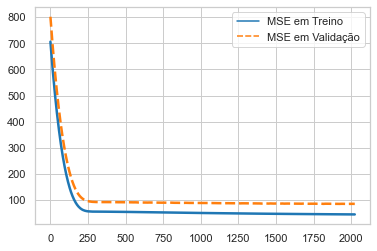

In [30]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette="tab10", linewidth=2.5)

In [31]:
# Previsões com o modelo treinado
previsoes = modelo.predict(y_teste).flatten()

In [32]:
# Imprime as previsões
previsoes

array([ 94.35701 ,  65.914   ,  91.51271 ,  69.32716 ,  61.931988,
       127.35089 , 162.05135 , 130.76404 ,  81.273224, 119.9557  ,
       166.60223 , 124.50659 , 116.54254 , 127.91974 , 122.8     ,
       113.129395, 121.09343 , 111.99167 , 175.704   ,  97.77017 ,
        90.94385 ,  96.06358 ,  96.63245 , 102.321045,  78.99779 ,
        89.23726 ,  98.339035,  69.89603 ,  98.339035, 271.27246 ,
       129.05746 , 118.24913 , 115.40483 , 126.78203 , 213.24875 ,
       171.72197 , 155.22504 , 193.90752 , 163.75793 , 271.27246 ,
       159.20705 , 227.47025 , 262.73956 ,  96.63245 , 113.129395,
       121.66229 ,  86.96182 , 127.91974 , 271.27246 , 264.44614 ,
       116.54254 , 271.27246 , 187.08119 , 175.13512 , 111.99167 ,
       113.69824 , 148.96758 , 199.02725 , 145.55441 , 122.23114 ,
       118.24913 ,  92.08156 , 129.05746 , 113.129395, 106.87193 ,
        92.08156 , 104.02763 ,  88.09955 , 115.973694, 115.40483 ,
       271.27246 ,  65.914   ,  36.902145,  44.866184,  52.261

## Fim